<a href="https://colab.research.google.com/github/Satish-kumar26/Capstone-Project/blob/main/Brain_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BRAIN STROKE PREDICTION :-

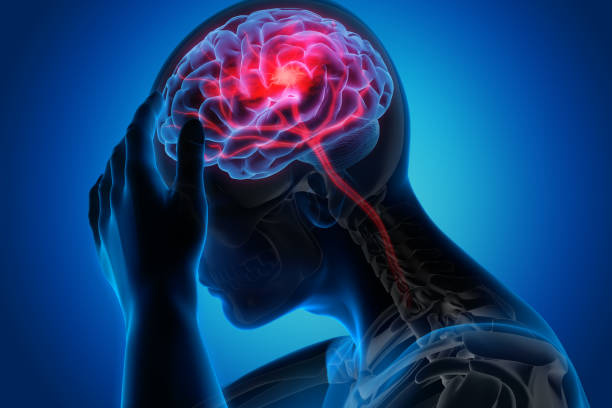

In [ ]:
# Import important Library
import numpy as npnp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings            #Dont show warning
warnings.filterwarnings('ignore')

In [ ]:
# Import Brain Stroke Dataset. (https://github.com/Kumar-Ritu-Raj/Send/blob/main/brain_stroke.csv)
Brain_stroke_data=pd.read_csv('https://raw.githubusercontent.com/Kumar-Ritu-Raj/Send/main/brain_stroke.csv')

In [ ]:
# Print 10 rows of the dataset
print(Brain_stroke_data.head(10))

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   
5    Male  74.0             1              1          Yes        Private   
6  Female  69.0             0              0           No        Private   
7  Female  78.0             0              0          Yes        Private   
8  Female  81.0             1              0          Yes        Private   
9  Female  61.0             0              1          Yes       Govt_job   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural         

# Pre-Procession

In [ ]:
# Information about data types.
Brain_stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# Sum of null value column wise
Brain_stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# delete less useful data
Brain_stroke_data = Brain_stroke_data.drop(["ever_married", "work_type", "Residence_type"], axis =1)

In [ ]:
# Print 10 rows of the dataset
Brain_stroke_data.head(10)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,70.09,27.4,never smoked,1
6,Female,69.0,0,0,94.39,22.8,never smoked,1
7,Female,78.0,0,0,58.57,24.2,Unknown,1
8,Female,81.0,1,0,80.43,29.7,never smoked,1
9,Female,61.0,0,1,120.46,36.8,smokes,1


In [ ]:
# count number of unique gender
Brain_stroke_data['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [ ]:
# count number of unique age
Brain_stroke_data['age'].value_counts()

78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

In [ ]:
# count number of unique hypertension
Brain_stroke_data['hypertension'].value_counts()

0    4502
1     479
Name: hypertension, dtype: int64

In [ ]:
# count number of unique heart_disease
Brain_stroke_data['heart_disease'].value_counts()

0    4706
1     275
Name: heart_disease, dtype: int64

In [ ]:
# count number of unique avg_glucose_level
Brain_stroke_data['avg_glucose_level'].value_counts()

93.88     6
73.00     5
83.16     5
91.85     5
72.49     5
         ..
130.56    1
67.78     1
116.12    1
59.63     1
83.94     1
Name: avg_glucose_level, Length: 3895, dtype: int64

In [ ]:
# count number of unique bmi
Brain_stroke_data['bmi'].value_counts()

28.7    42
28.4    41
27.3    38
27.7    37
26.7    37
        ..
48.4     1
48.2     1
46.6     1
40.6     1
14.9     1
Name: bmi, Length: 342, dtype: int64

In [ ]:
# count number of unique smoking_status
Brain_stroke_data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [ ]:
# count number of unique stroke
Brain_stroke_data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64



# Visualization

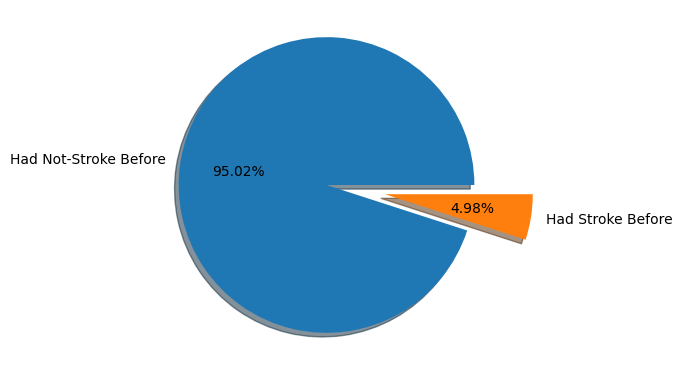

In [ ]:
# create pie chart
Stroke_pie_lable=['Had Not-Stroke Before','Had Stroke Before']
Stroke_pie_exp = [0.4, 0]
Stroke_pie_data=Brain_stroke_data['stroke'].value_counts()
Pie_plot=plt.pie(Stroke_pie_data, labels = Stroke_pie_lable, autopct='%1.2f%%', explode = Stroke_pie_exp, shadow=True)

plt.show()         # Show the graph

In [ ]:
# Show gender wise stroke
Brain_stroke_data.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

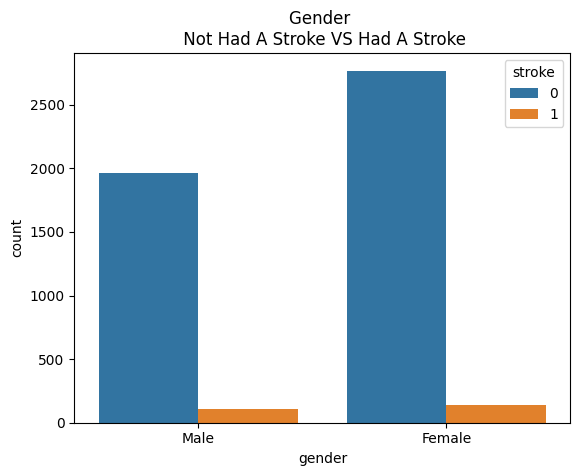

In [ ]:


# Create bar graph
Gender_stroke=sns.countplot(x='gender',hue='stroke',data=Brain_stroke_data)
Gender_stroke.set_title('Gender \n Not Had A Stroke VS Had A Stroke')
plt.show()   #Show graph

In [ ]:
# Show hypertension wise stroke
Brain_stroke_data.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

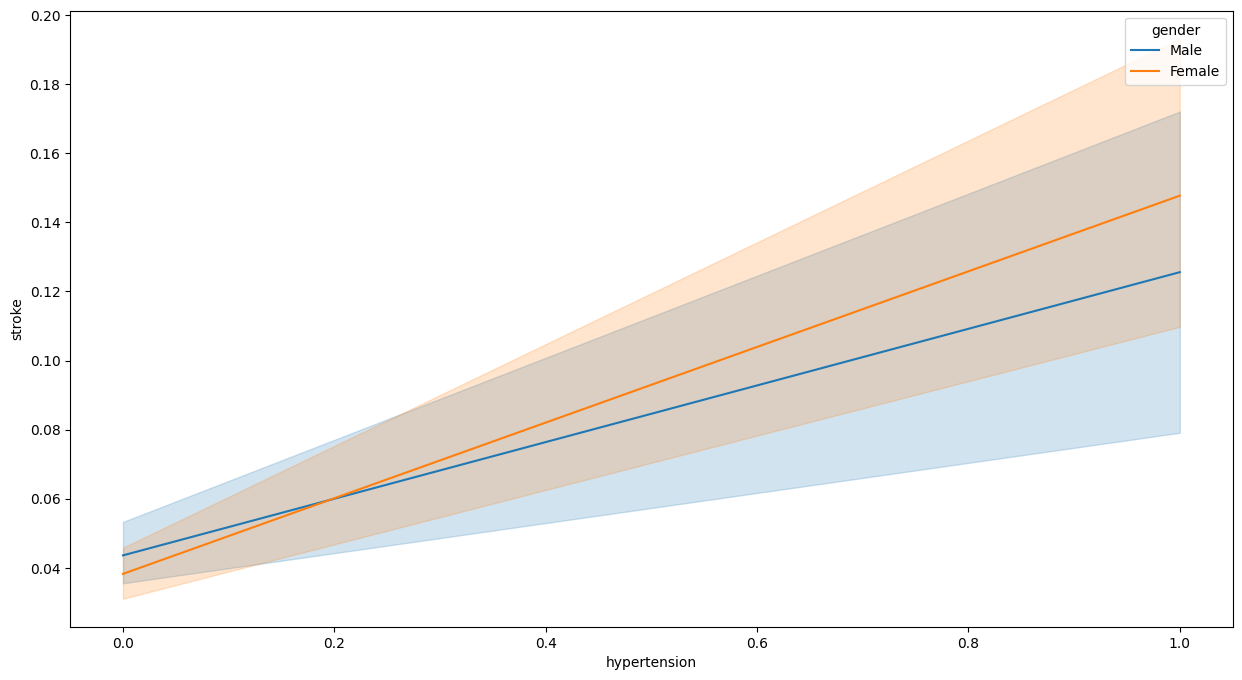

In [ ]:
# Create line plot
plt.figure(figsize = (15,8))
sns.lineplot(x='hypertension',y='stroke',hue='gender',data=Brain_stroke_data)
plt.show()    # show graph

In [ ]:
# Show heart_disease wise stroke
Brain_stroke_data.groupby(['heart_disease','stroke'])['stroke'].count()

heart_disease  stroke
0              0         4505
               1          201
1              0          228
               1           47
Name: stroke, dtype: int64

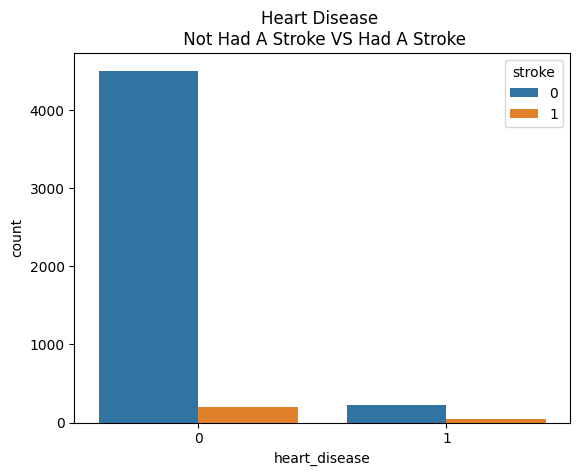

In [ ]:
# Create bar graph
Heart_disease_stroke=sns.countplot(x='heart_disease',hue='stroke',data=Brain_stroke_data)
Heart_disease_stroke.set_title('Heart Disease \n Not Had A Stroke VS Had A Stroke')
plt.show()      # show graph

In [ ]:
# Create color palette on crosstab
cms = sns.color_palette("blend:red,green", as_cmap=True)
pd.crosstab(Brain_stroke_data.smoking_status,Brain_stroke_data.stroke,margins=True).style.background_gradient(cmap=cms)

stroke,0,1,All
smoking_status,,,
Unknown,1453,47,1500
formerly smoked,797,70,867
never smoked,1749,89,1838
smokes,734,42,776
All,4733,248,4981


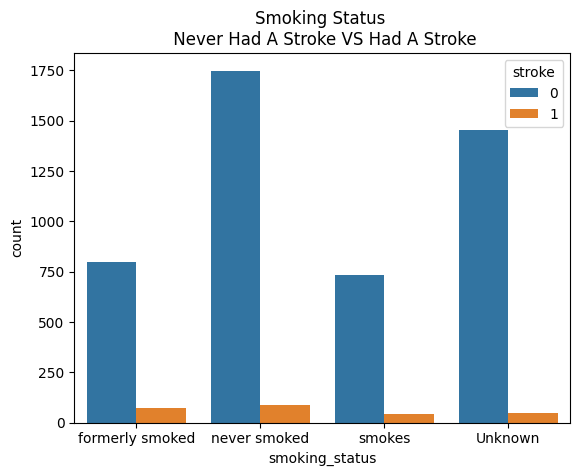

In [ ]:
# Create bargraph
Smoking_status_stroke=sns.countplot(x='smoking_status',hue='stroke',data=Brain_stroke_data)
Smoking_status_stroke.set_title('Smoking Status \n Never Had A Stroke VS Had A Stroke')
plt.show()       # show graph

In [ ]:
# Create color palette on crosstab
cm = sns.color_palette("blend:yellow,blue",as_cmap=True)
pd.crosstab([Brain_stroke_data.gender,Brain_stroke_data.stroke],Brain_stroke_data.smoking_status,margins=True).style.background_gradient(cmap=cm)

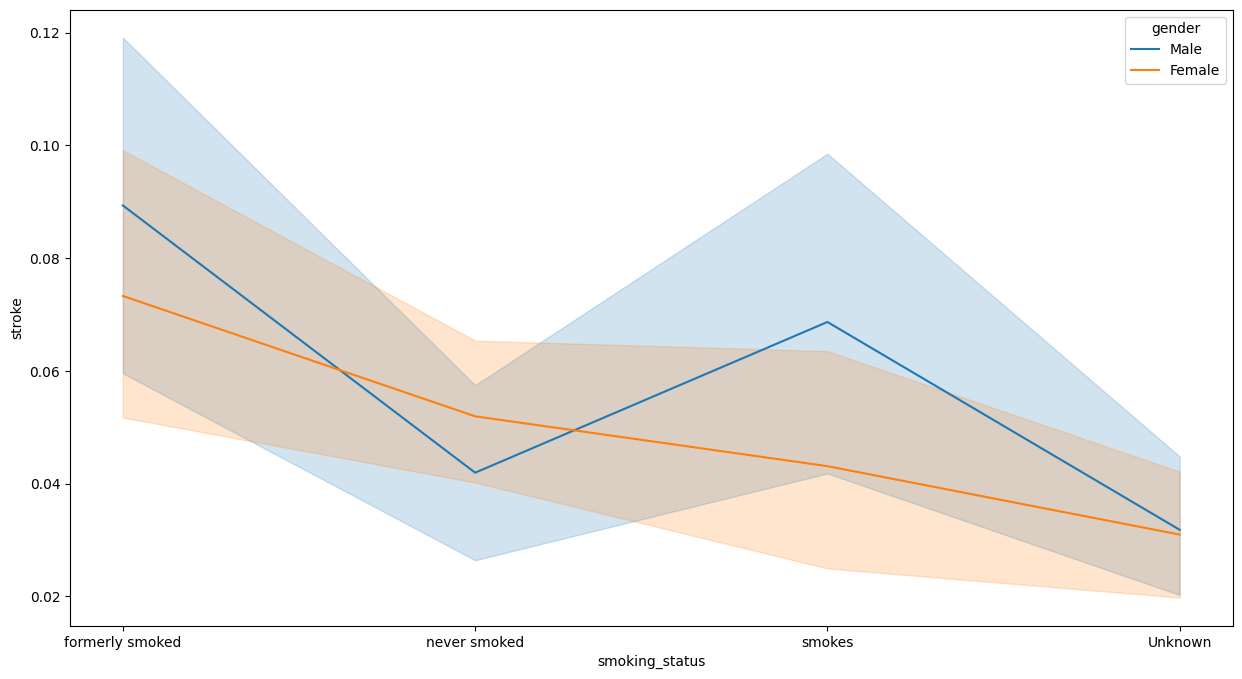

In [ ]:
# Create line plot
plt.figure(figsize = (15,8))
sns.lineplot(x='smoking_status',y='stroke',hue='gender',data=Brain_stroke_data)
plt.show()    # Show graph

In [ ]:
# min max and mean value of age
print('Youngest Person was of:',Brain_stroke_data['age'].min(),'Years')
print('Average Age in the data:',Brain_stroke_data['age'].mean(),'Years')
print('Oldest Person was of:',Brain_stroke_data['age'].max(),'Years')

Youngest Person was of: 0.08 Years
Average Age in the data: 43.41985946597069 Years
Oldest Person was of: 82.0 Years


In [ ]:


# min max and mean value of avg_glucose_level
print('Minimum "Average Glucose Level" in data:',Brain_stroke_data['avg_glucose_level'].min())
print('Average "Average Glucose Level" in data:',Brain_stroke_data['avg_glucose_level'].mean())
print('Maximum "Average Glucose Level" in data:',Brain_stroke_data['avg_glucose_level'].max())

Minimum "Average Glucose Level" in data: 55.12
Average "Average Glucose Level" in data: 105.94356153382854
Maximum "Average Glucose Level" in data: 271.74


In [ ]:
# min max and mean value of BMI
print('Minimum "BMI" in data:',Brain_stroke_data['bmi'].min())
print('Average "BMI" in data:',Brain_stroke_data['bmi'].mean())
print('Maximum "BMI" in data:',Brain_stroke_data['bmi'].max())

M_data=[Brain_stroke_data['age'].min(),Brain_stroke_data['age'].mean(),Brain_stroke_data['age'].max(),Brain_stroke_data['avg_glucose_level'].min(),Brain_stroke_data['avg_glucose_level'].mean(),Brain_stroke_data['avg_glucose_level'].max(),Brain_stroke_data['bmi'].min(),Brain_stroke_data['bmi'].mean(),Brain_stroke_data['bmi'].max()]


Minimum "BMI" in data: 14.0
Average "BMI" in data: 28.498173057618956
Maximum "BMI" in data: 48.9


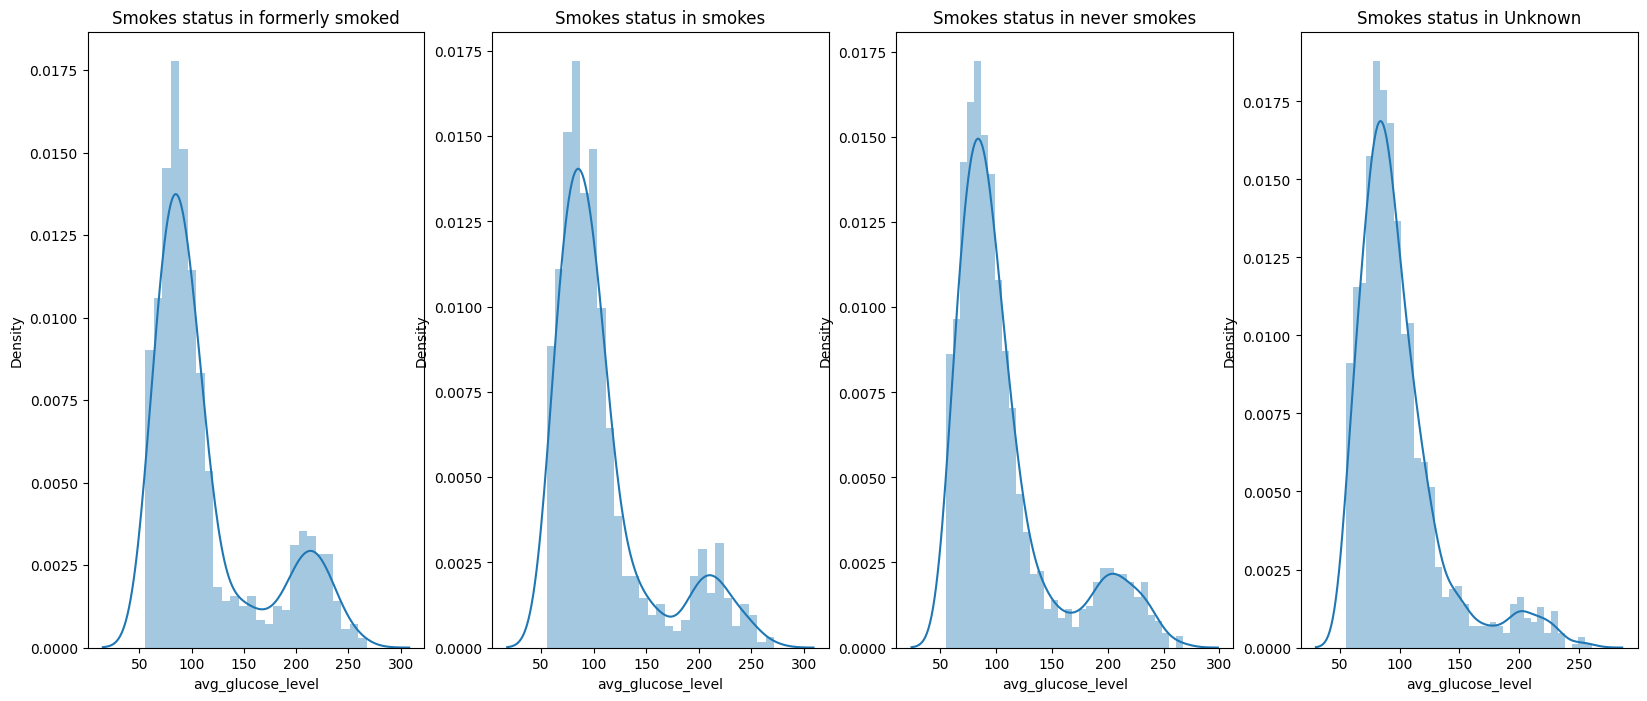

In [ ]:
# Plot graph with different smoked situation
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(Brain_stroke_data[Brain_stroke_data['smoking_status']=="formerly smoked"].avg_glucose_level,ax=ax[0])
ax[0].set_title('Smokes status in formerly smoked')
sns.distplot(Brain_stroke_data[Brain_stroke_data['smoking_status']=="smokes"].avg_glucose_level,ax=ax[1])
ax[1].set_title('Smokes status in smokes')
sns.distplot(Brain_stroke_data[Brain_stroke_data['smoking_status']== "never smoked"].avg_glucose_level,ax=ax[2])
ax[2].set_title('Smokes status in never smokes')
sns.distplot(Brain_stroke_data[Brain_stroke_data['smoking_status']== "Unknown"].avg_glucose_level,ax=ax[3])
ax[3].set_title('Smokes status in Unknown')
plt.show()      # show graph

# Correlation



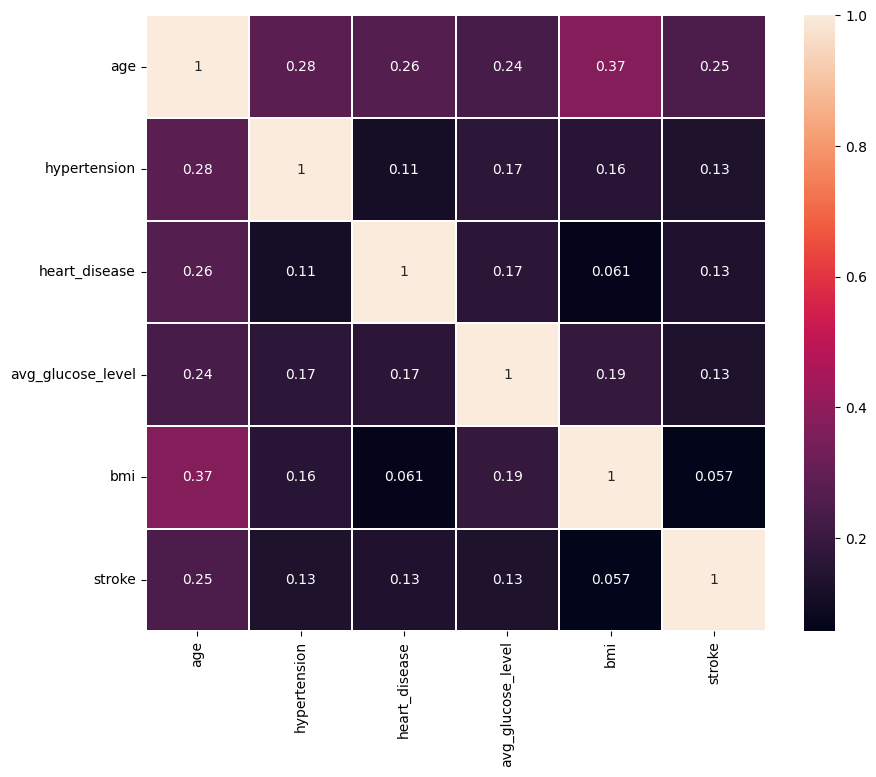

In [ ]:
 # Create Heat map
sns.heatmap(Brain_stroke_data.corr(),annot=True,linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()     # show graph

# Convert Categorical Variables into Numerical

In [ ]:
# Create age_band column
import numpy as np
Brain_stroke_data.insert(2,'age_band', np.zeros)

In [ ]:
# insert data in age_band in following range
Brain_stroke_data.loc[Brain_stroke_data['age']<=16,'age_band']=0
Brain_stroke_data.loc[(Brain_stroke_data['age']>16)&(Brain_stroke_data['age']<=32),'age_band']=1
Brain_stroke_data.loc[(Brain_stroke_data['age']>32)&(Brain_stroke_data['age']<=48),'age_band']=2
Brain_stroke_data.loc[(Brain_stroke_data['age']>48)&(Brain_stroke_data['age']<=64),'age_band']=3
Brain_stroke_data.loc[Brain_stroke_data['age']>64,'age_band']=4

In [ ]:
# Drop age column
Brain_stroke_data.drop(columns= "age", inplace=True)

In [ ]:
# change string column in numberic data
Brain_stroke_data["age_band"]=Brain_stroke_data['age_band'].astype(str).astype(int)
Brain_stroke_data.head()

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,228.69,36.6,formerly smoked,1
1,Male,4,0,1,105.92,32.5,never smoked,1
2,Female,3,0,0,171.23,34.4,smokes,1
3,Female,4,1,0,174.12,24.0,never smoked,1
4,Male,4,0,0,186.21,29.0,formerly smoked,1


In [ ]:
# count unique age_band
Brain_stroke_data['age_band'].value_counts().to_frame()

,age_band
3,1229
2,1067
4,1020
1,895
0,770


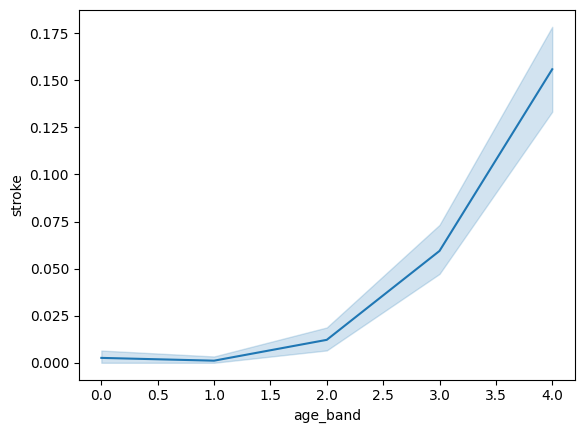

In [ ]:

# create line plot
sns.lineplot(x='age_band',y='stroke',data=Brain_stroke_data)
plt.show()   # show graph

In [ ]:
# change string column in numberic data
Brain_stroke_data['gender'].replace(['Male','Female'],[0,1],inplace=True)
Brain_stroke_data['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [ ]:
# unique smoking status variables
Brain_stroke_data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
# change string column in numberic data
Brain_stroke_data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
Brain_stroke_data['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

In [ ]:


# count unique stroke value
Brain_stroke_data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

# Normalization

In [ ]:
# copy the data
Brain_stroke_data = Brain_stroke_data.copy()

# apply normalization techniques on Columns
column = 'avg_glucose_level'
column2 = 'bmi'
Brain_stroke_data[column] = Brain_stroke_data[column] /Brain_stroke_data[column].abs().max()
Brain_stroke_data[column2] = Brain_stroke_data[column2] /Brain_stroke_data[column2].abs().max()

# view normalized data
display(Brain_stroke_data[column], Brain_stroke_data[column2])



0       0.841577
1       0.389784
2       0.630124
3       0.640760
4       0.685251
          ...   
4976    0.258151
4977    0.703430
4978    0.349672
4979    0.308898
4980    0.308199
Name: avg_glucose_level, Length: 4981, dtype: float64

0       0.748466
1       0.664622
2       0.703476
3       0.490798
4       0.593047
          ...   
4976    0.609407
4977    0.635992
4978    0.650307
4979    0.613497
4980    0.595092
Name: bmi, Length: 4981, dtype: float64

# importing all the required ML packages

In [ ]:

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure

# Train and Test Data

In [ ]:
test_size =0.3
train,test=train_test_split(Brain_stroke_data,test_size=test_size,random_state=0,stratify=Brain_stroke_data['stroke'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]

X=Brain_stroke_data[Brain_stroke_data.columns[:-1]]
Y=Brain_stroke_data["stroke"]

print("Train Data = ",100-test_size*100,"%\nTest Data = ",test_size*100,"%")
len(train_X), len(train_Y), len(test_X), len(test_Y)

T_data=[len(train_X), len(test_X),100-test_size*100,test_size*100,len(train_X)+len(test_X)]  #to send


Train Data =  70.0 %
Test Data =  30.0 %


# Accuracy of Each model

In [ ]:
#Radial Support Vector Machines(rbf-SVM)
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction_radial=model.predict(test_X)
RSVM_Accuracy=metrics.accuracy_score(prediction_radial,test_Y)
RSVM_Accuracy

0.9505016722408027

In [ ]:
#Linear Support Vector Machine(linear-SVM)
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction_linear=model.predict(test_X)
LSVM_Accuracy=metrics.accuracy_score(prediction_linear,test_Y)
LSVM_Accuracy

0.9505016722408027

In [ ]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction_decision=model.predict(test_X)
DT_Accuracy=metrics.accuracy_score(prediction_decision,test_Y)
DT_Accuracy

0.9137123745819398

In [ ]:
#K-Nearest Neighbours(KNN)
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction_knn=model.predict(test_X)
KNN_Accuracy=metrics.accuracy_score(prediction_knn,test_Y)
KNN_Accuracy

0.9444816053511705

In [ ]:
#Gaussian Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y)
prediction_gnb=model.predict(test_X)
GNB_Accuracy=metrics.accuracy_score(prediction_gnb,test_Y)
GNB_Accuracy

0.862876254180602

In [ ]:
#Random Forests
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction_rf=model.predict(test_X)
RF_Accuracy=metrics.accuracy_score(prediction_rf,test_Y)
RF_Accuracy

0.9438127090301003

In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction_logistic=model.predict(test_X)
LR_Accuracy=metrics.accuracy_score(prediction_logistic,test_Y)
LR_Accuracy

0.9505016722408027

# Cofficient

In [ ]:
# find cofficient of bita 0 and bita 1
A_data=[RSVM_Accuracy, LSVM_Accuracy, DT_Accuracy, KNN_Accuracy, GNB_Accuracy, RF_Accuracy, LR_Accuracy]
z=model.intercept_[0] #bita 0
C_data=[z]

for i in model.coef_:
  for j in i:
    C_data.append(j)

print(C_data)


#p(x) = 1 / (1 + e^(-z))
#z = b0 + b1x1 + b2x2 + ... + bn*xn
#p = 1 / (1 + exp(-(b0 + b1x1 + b2x2 + ... + bnxn)))

[-6.859252363611558, 0.07300729515140171, 1.1875188192181916, 0.551390346538027, 0.2881869944888988, 0.8808601831999583, -0.21196669408772914, -0.05345104279590599]


# Install Required Package

In [ ]:
!pip install pyngrok==4.1.1
!pip install flask-ngrok
!git clone https://github.com/Kumar-Ritu-Raj/templates.git   #import data from github
!ngrok authtoken 2LDmtALOeDN5RG0OevVVbsloHGE_G1UoFHr46jC81ot1dGjF
!pip install flask_bootstrap

fatal: destination path 'templates' already exists and is not an empty directory.
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# import required library
from flask import Flask, render_template
from flask_bootstrap import Bootstrap
from flask_ngrok import run_with_ngrok

C_data=[round(num, 8) for num in C_data]
A_data=[round(num, 8) for num in A_data]
T_data=[round(num, 2) for num in T_data]
M_data=[round(num, 8) for num in M_data]



# Run Brain Prediction Site :)

In [ ]:
# run flask to connect python to html
app= Flask(__name__)
app_static_folder= '/content/templates'
bootstrap=Bootstrap(app)
run_with_ngrok(app)

@app.route("/")
def home():
  return render_template('main.html',M_data=M_data,T_data=T_data,A_data=A_data,C_data=C_data)

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://eb3a-34-90-200-75.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [22/Dec/2023 22:26:41] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Dec/2023 22:26:41] "GET /main_css.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [22/Dec/2023 22:26:42] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [22/Dec/2023 22:30:58] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Dec/2023 22:30:59] "GET /main_css.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [22/Dec/2023 22:32:56] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Dec/2023 22:32:57] "GET /main_css.css HTTP/1.1" 404 -


# New Section

# Description

In [ ]:


"""
1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
5) ever-married: "No" or "Yes"
6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed"
7) Residencetype: "Rural" or "Urban"
8) avgglucoselevel: average glucose level in blood
9) bmi: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient
"""

'\n1) gender: "Male", "Female" or "Other"\n2) age: age of the patient\n3) hypertension: 0 if the patient doesn\'t have hypertension, 1 if the patient has hypertension\n4) heart disease: 0 if the patient doesn\'t have any heart diseases, 1 if the patient has a heart disease\n5) ever-married: "No" or "Yes"\n6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed"\n7) Residencetype: "Rural" or "Urban"\n8) avgglucoselevel: average glucose level in blood\n9) bmi: body mass index\n10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*\n11) stroke: 1 if the patient had a stroke or 0 if not\n\n*Note: "Unknown" in smoking_status means that the information is unavailable for this patient\n'

# New Section

# New section